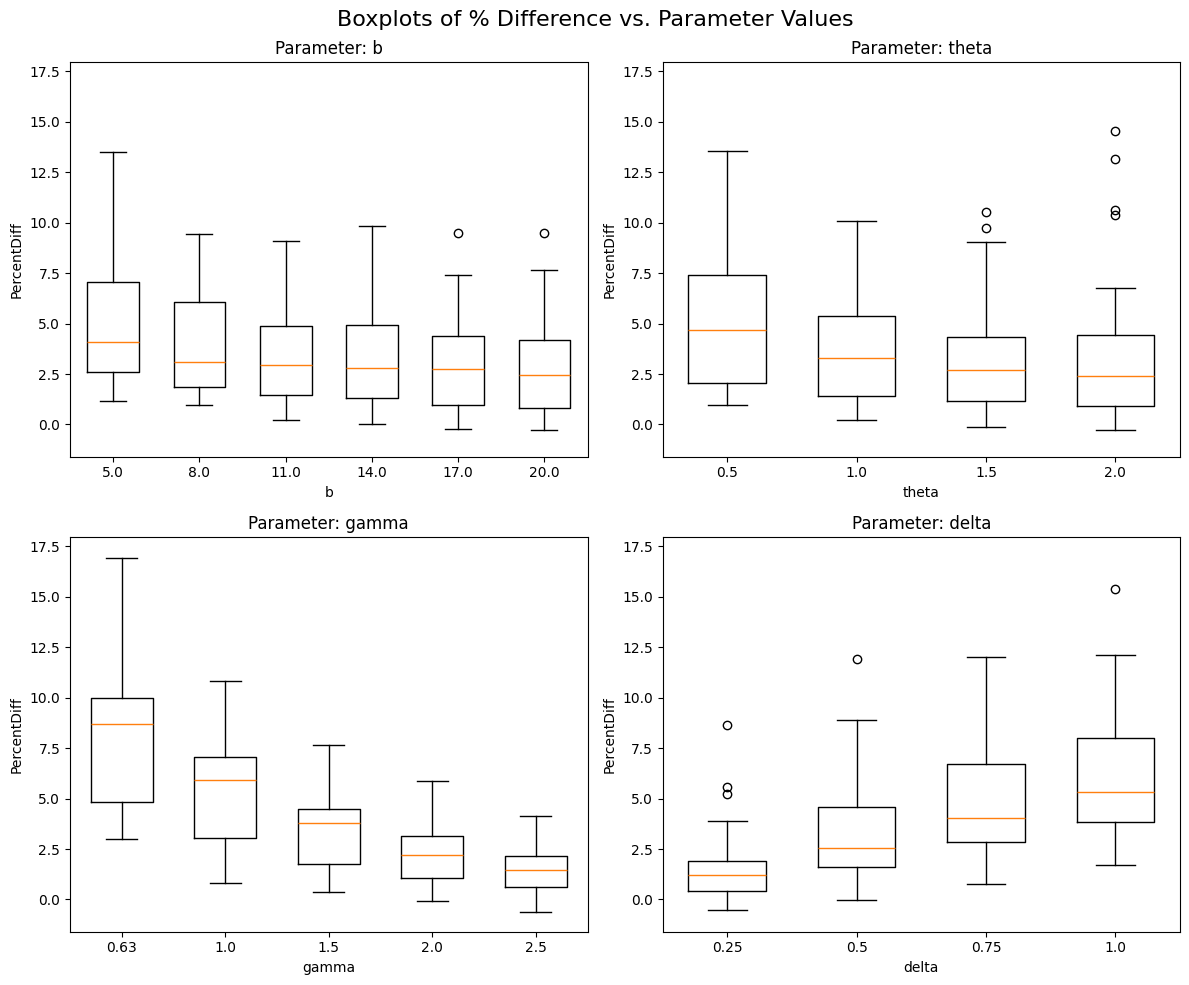

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Read CSV data
df = pd.read_csv("simulation_results.csv")  
# Adjust filename/path if needed

# 2) Drop rows where MeanAlpha_s0 == 0 or MeanAlpha_s1 == 0
#    (i.e., runs that went extinct or produced invalid results)
df = df[(df["MeanAlpha_s0"] != 0) & (df["MeanAlpha_s1"] != 0) & (df["PercentDiff"] != 0)]

# 3) Identify the parameters of interest
params = ['b', 'theta', 'gamma', 'delta']

# 4) Create subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # So we can index them in a 1D list: axes[0], axes[1], ...

# 5) Determine global y-axis limits based on all PercentDiff values
#    (so all subplots share the same range)
y_min = df['PercentDiff'].min()-1
y_max = df['PercentDiff'].max()+1

for i, param in enumerate(params):
    ax = axes[i]
    # Keep only rows for this parameter
    sub_df = df[df['VariedParam'] == param]

    # Get the distinct parameter values in ascending order
    unique_vals = sorted(sub_df['VariedValue'].unique())

    # For each param value, collect the PercentDiff values
    data_for_boxplot = []
    for val in unique_vals:
        subset = sub_df[sub_df['VariedValue'] == val]['PercentDiff'].dropna()
        data_for_boxplot.append(subset.values)

    # We'll position the boxplots at x=1..N, instead of the actual param values
    x_positions = range(1, len(unique_vals) + 1)

    # Create the boxplot
    ax.boxplot(data_for_boxplot, positions=x_positions, widths=0.6)

    # Titles, labels, and x-ticks
    ax.set_title(f"Parameter: {param}")
    ax.set_xlabel(param)
    ax.set_ylabel("PercentDiff")

    ax.set_xticks(x_positions)
    ax.set_xticklabels([str(v) for v in unique_vals], rotation=0)

    # 6) Set the y-axis limit to be the same across all subplots
    ax.set_ylim([y_min, y_max])

# 7) Overall formatting
fig.suptitle("Boxplots of % Difference vs. Parameter Values", fontsize=16)
plt.tight_layout()
plt.show()
